In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

data= pd.read_csv("student-mat.csv")


In [100]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


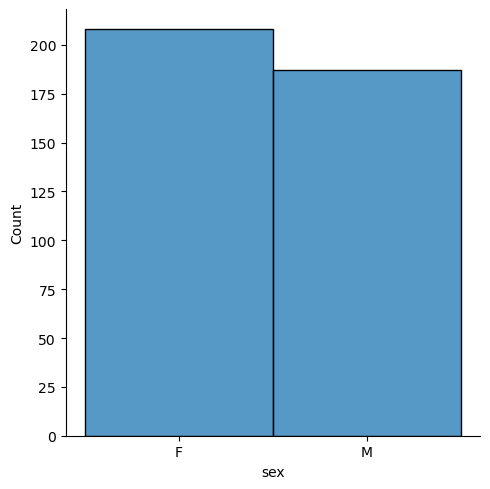

In [3]:
sns.displot(data['sex'])

In [101]:
sns.displot(data,x="G3",hue="sex")

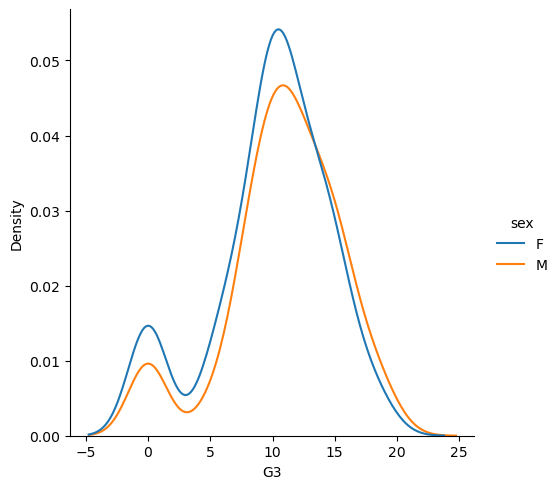

In [2]:
sns.displot(data,x="G3",hue="sex",kind="kde")

In [5]:
sns.boxplot(data=data,x="sex",y="G3")

<AxesSubplot:xlabel='sex', ylabel='G3'>

In [21]:
data_m = data[data["sex"]=="M"]
data_w = data[data["sex"]=="F"]

In [22]:
print(data_m["G3"].mean())
print(data_w["G3"].mean())
print(data_m[data_m["G3"]>0]["G3"].mean())
print(data_w[data_w['G3']>0]["G3"].mean())

10.914438502673796
9.966346153846153
11.866279069767442
11.205405405405406


In [23]:
from scipy.stats import bartlett
stat, p = bartlett(data_m[data_m["G3"]>0]["G3"],data_w[data_w["G3"]>0]["G3"])
print(stat,p)

0.1214772696636538 0.7274377618424044


In [25]:
stats.ttest_ind(data_m[data_m["G3"]>0]["G3"],data_w[data_w["G3"]>0]["G3"],equal_var=True)

Ttest_indResult(statistic=1.9404771273257526, pvalue=0.053113174845791505)

In [29]:
data_m = data_m[data_m["G3"]>0]["G3"]
data_w = data_w[data_w["G3"]>0]["G3"]

In [30]:
print(len(data_m))
print(len(data_w))

172
185


In [75]:
data_m.describe()

count    172.000000
mean      11.866279
std        3.258748
min        5.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [76]:
data_w.describe()

count    185.000000
mean      11.205405
std        3.174452
min        4.000000
25%        9.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G3, dtype: float64

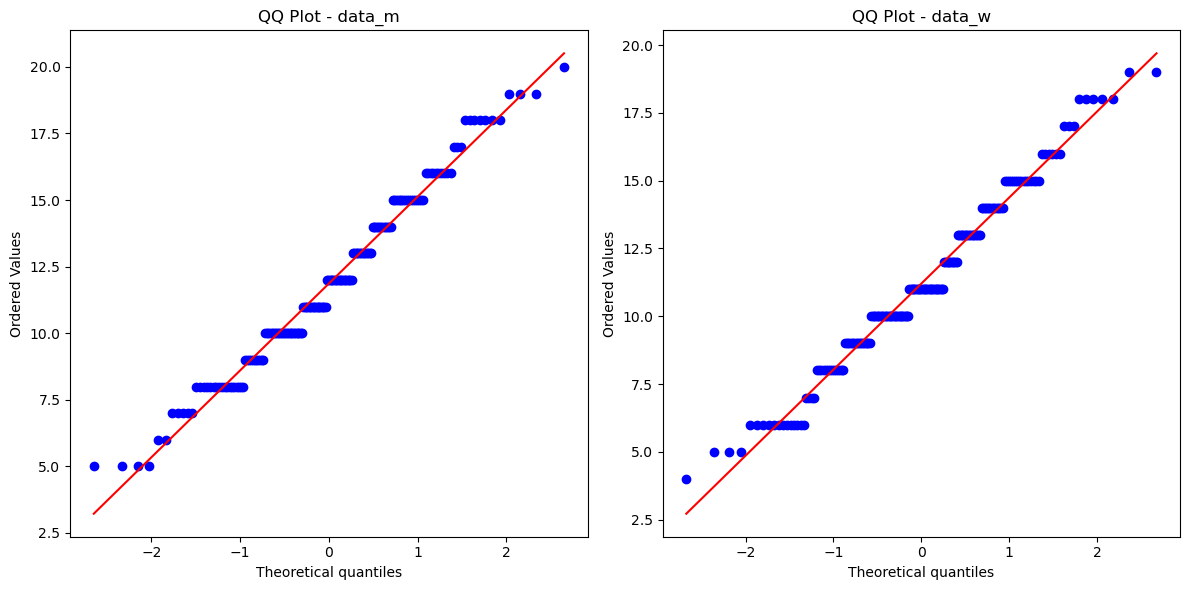

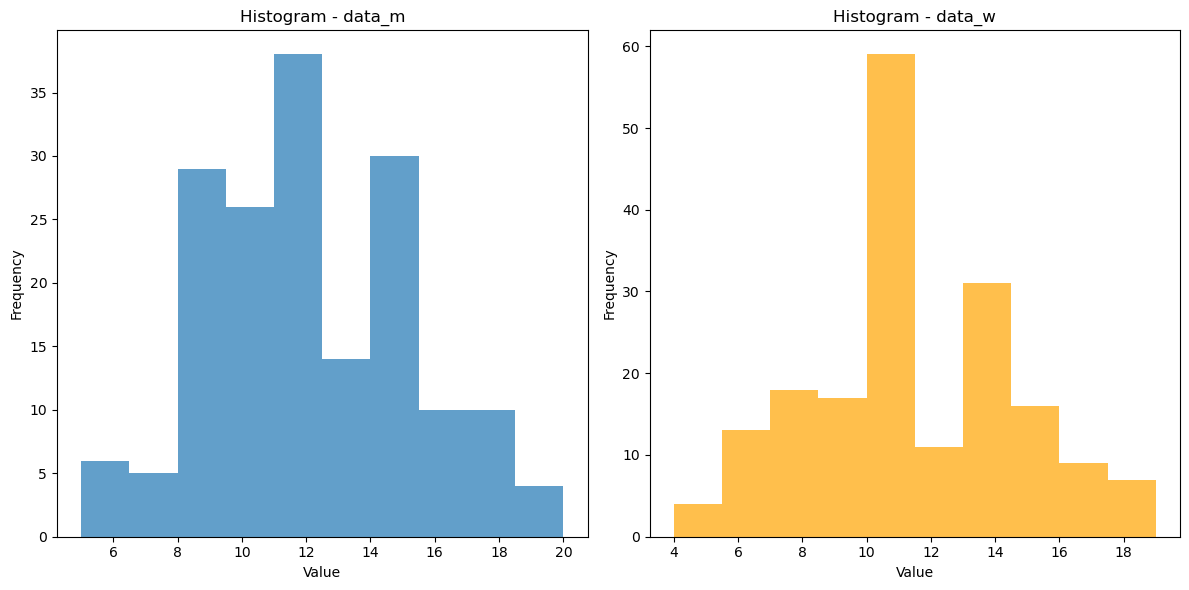

In [41]:
import matplotlib.pyplot as plt

# Plotting QQ plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(data_m, dist="norm", plot=plt)
plt.title("QQ Plot - data_m")

plt.subplot(1, 2, 2)
stats.probplot(data_w, dist="norm", plot=plt)
plt.title("QQ Plot - data_w")

plt.tight_layout()
plt.show()

# Plotting histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data_m, bins=10, alpha=0.7, label="data_m")
plt.title("Histogram - data_m")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(data_w, bins=10, alpha=0.7, label="data_w", color='orange')
plt.title("Histogram - data_w")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



In [77]:
print("data_m의 정규성",stats.shapiro(data_m))
print("data_w의 정규성",stats.shapiro(data_w))

data_m의 정규성 ShapiroResult(statistic=0.9788146615028381, pvalue=0.009935521520674229)
data_w의 정규성 ShapiroResult(statistic=0.9785570502281189, pvalue=0.006041768938302994)


In [51]:
mean_m, std_m = np.mean(data_m), np.std(data_m)
mean_w, std_w = np.mean(data_w), np.std(data_w)

print("ks_test & data_m의 결과 ",stats.kstest(data_m, 'norm', args=(mean_m, std_m)))
print("ks_test & data_w의 결과" ,stats.kstest(data_w, 'norm', args=(mean_w, std_w)))

ks_test & data_m의 결과  KstestResult(statistic=0.10086228450774237, pvalue=0.05628834890664047)
ks_test & data_w의 결과 KstestResult(statistic=0.12586577693158563, pvalue=0.005161903291796414)


In [82]:
from scipy.stats import jarque_bera
stat, p_value = jarque_bera(data_m)
print("Test Statistic:", stat)
print("p-value:", p_value)

Test Statistic: 3.0406254237317034
p-value: 0.2186435038426241


In [81]:
from scipy.stats import normaltest
stat, p_value = normaltest(data_m)
print("Test Statistic:", stat)
print("p-value:", p_value)

Test Statistic: 3.7174901419749595
p-value: 0.15586811109986803


In [ ]:
# 샤피로 테스트를 근거로 정규성이 없다는 대립가설을 채택
# 이유 샤피로가 다른 테스트 보다분포의 전체적인 형태를 평가하는 데 민감함. 특히, 작은 왜도(skewness)와 첨도(kurtosis)에도 민감하게 반응.
#첨도외 왜도를 기준으로는 정규분포와 유사하다 볼수 있지만 
#그것만 가지고 판단하기 보다 작은 비대칭성이나 이상치에 더 민감하게 반응하는 점을 추가로 고려해야 한다.
#샘플의 갯수가 100~200 이므로 샤피로 테스트가 민감하게 반응하는 것이 오히려 정확할 것이라고 판단
#샘플의 갯수가 너무 많으면 너무 민감한게 오히려 독이 될 수 있겠지만 이 샘플에서는 유효한 검정이라고 생각한다.

In [63]:
from scipy.stats import levene
from scipy.stats import fligner
print("levene테스트 결과:",stats.levene(data_m, data_w))
print("fligner테스트 결과:",stats.fligner(data_m,data_w))
print("결론: 분산이 같다는 귀무가설을 기각할 수 없다")

levene테스트 결과: LeveneResult(statistic=0.6144552033049334, pvalue=0.4336379490863752)
fligner테스트 결과: FlignerResult(statistic=0.4455866504689745, pvalue=0.5044382692544688)
결론: 분산이 같다는 귀무가설을 기각할 수 없다


In [68]:
from scipy.stats import ttest_ind
print(ttest_ind(data_m, data_w, equal_var=True))

Ttest_indResult(statistic=1.9404771273257526, pvalue=0.053113174845791505)


In [73]:
from scipy.stats import ranksums

w_stat, p_ranksum = ranksums(data_m, data_w)
print(f"Wilcoxon Rank-Sum Test p-value: ",ranksums(data_m, data_w))


Wilcoxon Rank-Sum Test p-value:  RanksumsResult(statistic=1.764823191570922, pvalue=0.077593485676993)


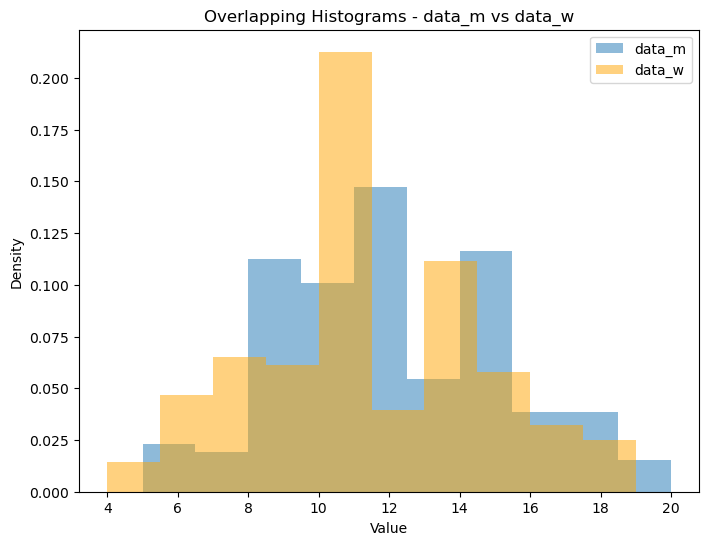

In [92]:
# Modify the code to overlap the histograms for better comparison

plt.figure(figsize=(8, 6))

# Overlapping histograms
plt.hist(data_m, bins=10, alpha=0.5, label="data_m", density=True)
plt.hist(data_w, bins=10, alpha=0.5, label="data_w", color='orange', density=True)

# Adding labels and legend
plt.title("Overlapping Histograms - data_m vs data_w")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.show()


In [36]:
from scipy.stats import mannwhitneyu


u_stat, p_mwu = mannwhitneyu(data_m, data_w, alternative='less')
print(f"Mann-Whitney U Test p-value: {p_mwu}")


Mann-Whitney U Test p-value: 0.0005226337837144511


In [26]:
#포르투갈언어 시험성적에 관한 자료에 대해서도 마찬가지 분석을 진행
data= pd.read_csv("student-por.csv")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [27]:
data_m = data[data["sex"]=="M"]
data_w = data[data["sex"]=="F"]
print(data_m["G3"].mean())
print(data_w["G3"].mean())
print(data_m[data_m["G3"]>0]["G3"].mean())
print(data_w[data_w['G3']>0]["G3"].mean())

11.406015037593985
12.2532637075718
11.75968992248062
12.481382978723405


In [28]:
from scipy.stats import bartlett
stat, p = bartlett(data_m[data_m["G3"]>0]["G3"],data_w[data_w["G3"]>0]["G3"])
print(stat,p)

0.017198789813110956 0.8956612708580117


In [29]:
stats.ttest_ind(data_m[data_m["G3"]>0]["G3"],data_w[data_w["G3"]>0]["G3"],equal_var=True)

Ttest_indResult(statistic=-3.342934419210429, pvalue=0.0008779197508574923)

In [30]:
data_m = data_m[data_m["G3"]>0]["G3"]
data_w = data_w[data_w["G3"]>0]["G3"]

In [31]:
print(len(data_m))
print(len(data_w))

258
376


In [32]:
print(data_m.describe())
print(data_w.describe())

count    258.000000
mean      11.759690
std        2.682339
min        1.000000
25%       10.000000
50%       11.000000
75%       13.750000
max       19.000000
Name: G3, dtype: float64
count    376.000000
mean      12.481383
std        2.662265
min        7.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64


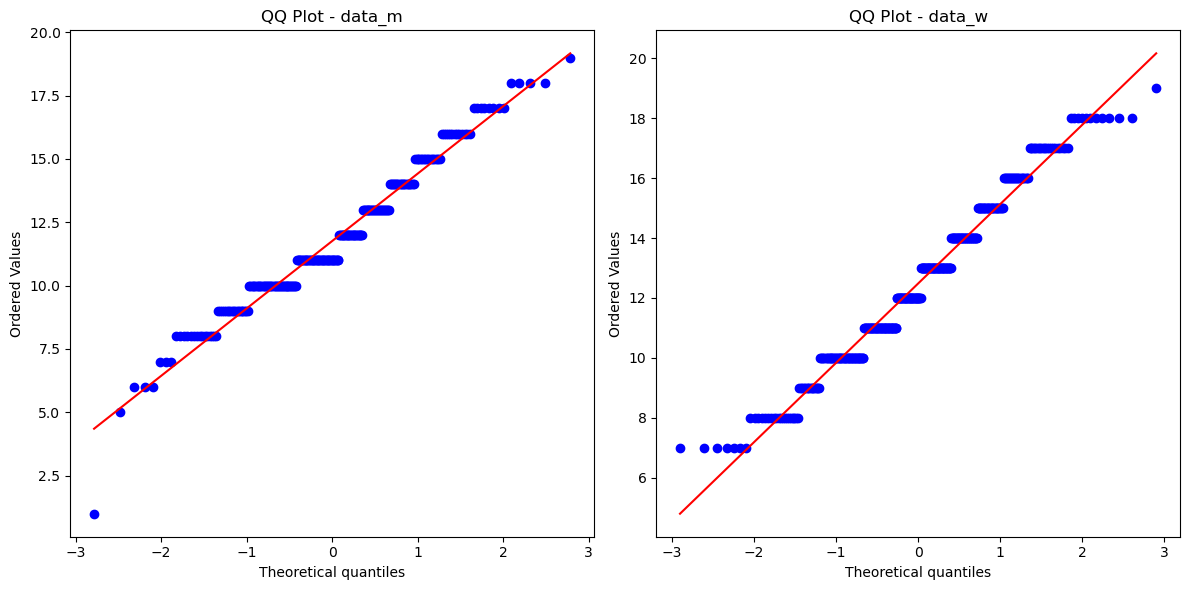

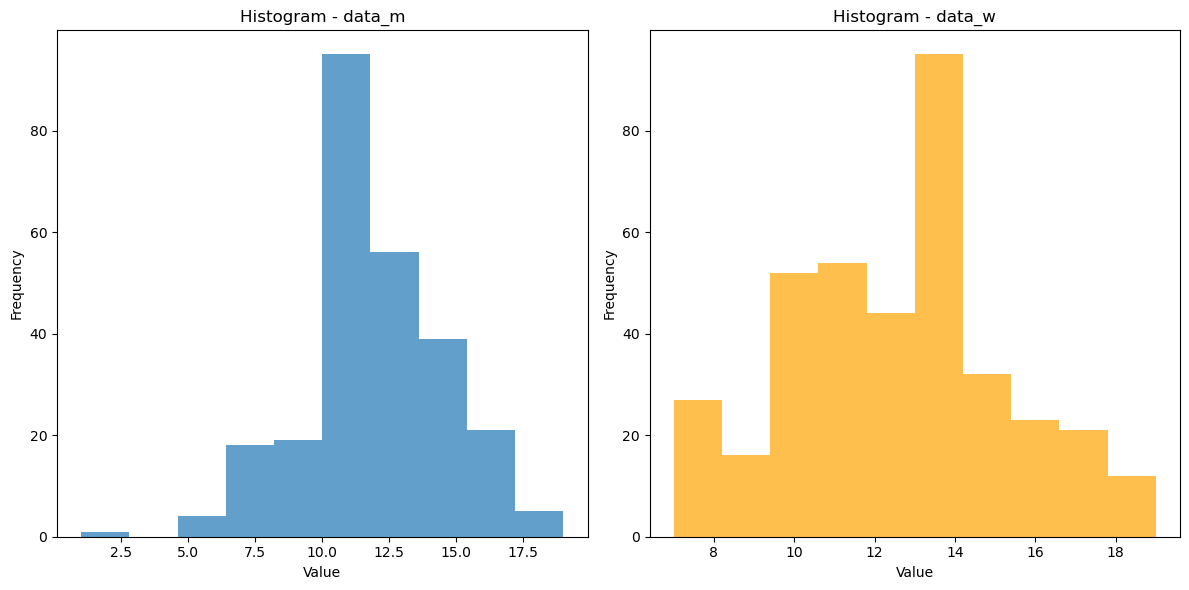

In [10]:
import matplotlib.pyplot as plt

# Plotting QQ plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(data_m, dist="norm", plot=plt)
plt.title("QQ Plot - data_m")

plt.subplot(1, 2, 2)
stats.probplot(data_w, dist="norm", plot=plt)
plt.title("QQ Plot - data_w")

plt.tight_layout()
plt.show()

# Plotting histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data_m, bins=10, alpha=0.7, label="data_m")
plt.title("Histogram - data_m")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(data_w, bins=10, alpha=0.7, label="data_w", color='orange')
plt.title("Histogram - data_w")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



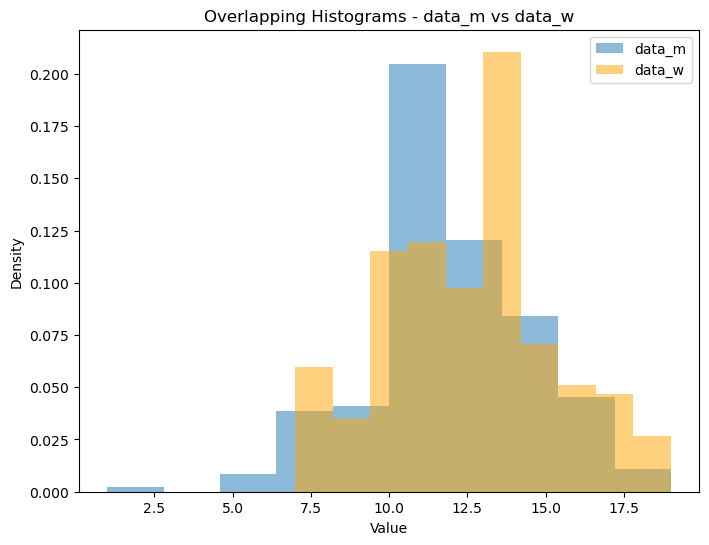

In [24]:
# Modify the code to overlap the histograms for better comparison

plt.figure(figsize=(8, 6))

# Overlapping histograms
plt.hist(data_m, bins=10, alpha=0.5, label="data_m", density=True)
plt.hist(data_w, bins=10, alpha=0.5, label="data_w", color='orange', density=True)

# Adding labels and legend
plt.title("Overlapping Histograms - data_m vs data_w")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.show()

In [13]:
print("data_m의 정규성",stats.shapiro(data_m))
print("data_w의 정규성",stats.shapiro(data_w))

data_m의 정규성 ShapiroResult(statistic=0.9713147282600403, pvalue=4.664006701204926e-05)
data_w의 정규성 ShapiroResult(statistic=0.9747232794761658, pvalue=3.8834627957839984e-06)


In [14]:
mean_m, std_m = np.mean(data_m), np.std(data_m)
mean_w, std_w = np.mean(data_w), np.std(data_w)

print("ks_test & data_m의 결과 ",stats.kstest(data_m, 'norm', args=(mean_m, std_m)))
print("ks_test & data_w의 결과" ,stats.kstest(data_w, 'norm', args=(mean_w, std_w)))

ks_test & data_m의 결과  KstestResult(statistic=0.142714290510348, pvalue=4.767702005030989e-05)
ks_test & data_w의 결과 KstestResult(statistic=0.10757389252617444, pvalue=0.0003040247723250106)


In [21]:
from scipy.stats import jarque_bera
stat, p_value = jarque_bera(data_w)
print("Test Statistic:", stat)
print("p-value:", p_value)

Test Statistic: 7.555644810811773
p-value: 0.02287244414553058


In [20]:
from scipy.stats import normaltest
stat, p_value = normaltest(data_w)
print("Test Statistic:", stat)
print("p-value:", p_value)

Test Statistic: 13.478901038958876
p-value: 0.0011832971767611806


In [17]:
from scipy.stats import levene
from scipy.stats import fligner
print("levene테스트 결과:",stats.levene(data_m, data_w))
print("fligner테스트 결과:",stats.fligner(data_m,data_w))
print("결론: 분산이 같다는 귀무가설을 기각할 수 없다")

levene테스트 결과: LeveneResult(statistic=0.5699053541647334, pvalue=0.4505777486357717)
fligner테스트 결과: FlignerResult(statistic=0.37879627131036775, pvalue=0.538248156579413)
결론: 분산이 같다는 귀무가설을 기각할 수 없다


In [35]:
from scipy.stats import ttest_ind
print(ttest_ind(data_m, data_w, equal_var=True,alternative="greater"))

Ttest_indResult(statistic=-3.342934419210429, pvalue=0.9995610401245713)


In [19]:
from scipy.stats import ranksums

w_stat, p_ranksum = ranksums(data_m, data_w)
print(f"Wilcoxon Rank-Sum Test p-value: ",ranksums(data_m, data_w))

Wilcoxon Rank-Sum Test p-value:  RanksumsResult(statistic=-3.2557446208016954, pvalue=0.001130954259649573)


In [23]:
from scipy.stats import mannwhitneyu


u_stat, p_mwu = mannwhitneyu(data_m, data_w, alternative='less')
print(f"Mann-Whitney U Test p-value: {p_mwu}")


Mann-Whitney U Test p-value: 0.0005226337837144511
